# チャレンジ: データサイエンスに関するテキストの分析

この例では、伝統的なデータサイエンスプロセスのすべてのステップをカバーする簡単な演習を行います。コードを書く必要はありません。以下のセルをクリックして実行し、結果を観察するだけで構いません。チャレンジとして、異なるデータでこのコードを試してみることをお勧めします。

## 目標

このレッスンでは、データサイエンスに関連するさまざまな概念について議論してきました。**テキストマイニング**を行うことで、さらに関連する概念を発見してみましょう。データサイエンスに関するテキストを使い、そこからキーワードを抽出し、結果を視覚化してみます。

テキストとして、Wikipediaのデータサイエンスに関するページを使用します:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## ステップ1: データの取得

データサイエンスプロセスの最初のステップは、データを取得することです。これには `requests` ライブラリを使用します。


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## ステップ2: データの変換

次のステップは、データを処理に適した形式に変換することです。今回の場合、ページからHTMLソースコードをダウンロードしており、それをプレーンテキストに変換する必要があります。

これを行う方法は多数あります。ここでは、Pythonの組み込みオブジェクトである[HTMLParser](https://docs.python.org/3/library/html.parser.html)を使用します。`HTMLParser`クラスをサブクラス化し、`<script>`タグや`<style>`タグを除くHTMLタグ内のすべてのテキストを収集するコードを定義します。


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## ステップ 3: インサイトを得る

最も重要なステップは、データをインサイトを引き出せる形に変えることです。今回の場合、テキストからキーワードを抽出し、どのキーワードがより意味のあるものかを確認します。

キーワード抽出には、[RAKE](https://github.com/aneesha/RAKE) というPythonライブラリを使用します。まず、このライブラリがインストールされていない場合に備えて、インストールを行いましょう:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


主要な機能は`Rake`オブジェクトから利用可能であり、いくつかのパラメーターを使用してカスタマイズできます。今回の場合、キーワードの最小長を5文字、ドキュメント内でのキーワードの最小頻度を3、キーワード内の最大単語数を2に設定します。他の値を試して結果を観察してみてください。


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

私たちは、重要度と関連付けられた用語のリストを取得しました。ご覧の通り、機械学習やビッグデータのような最も関連性の高い分野が、リストの上位に位置しています。

## ステップ4: 結果の可視化

データは視覚的な形式で解釈するのが最も簡単です。そのため、洞察を得るためにデータを可視化することはよく理にかなっています。Pythonの`matplotlib`ライブラリを使用して、キーワードとその関連性の単純な分布をプロットすることができます。


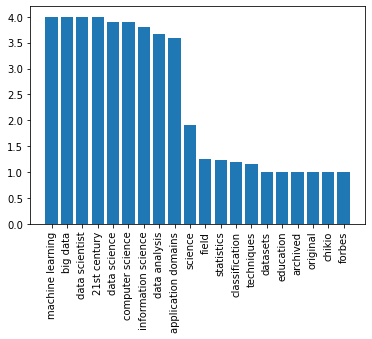

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

しかし、単語の頻度を視覚化するさらに良い方法があります。それは、**ワードクラウド**を使用することです。キーワードリストからワードクラウドをプロットするために、別のライブラリをインストールする必要があります。


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`オブジェクトは、元のテキストまたは事前に計算された単語とその頻度のリストを受け取り、画像を返します。その画像は`matplotlib`を使用して表示することができます。


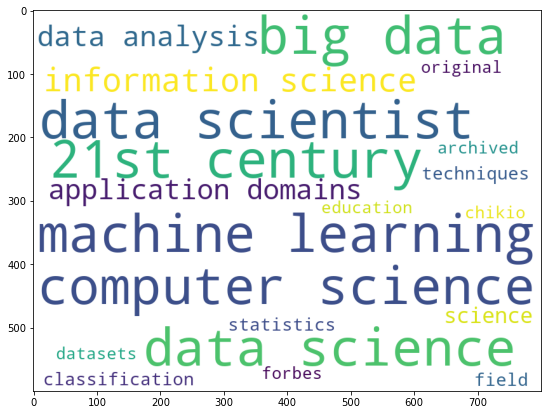

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

元のテキストを `WordCloud` に渡すこともできます - 同様の結果が得られるか見てみましょう:


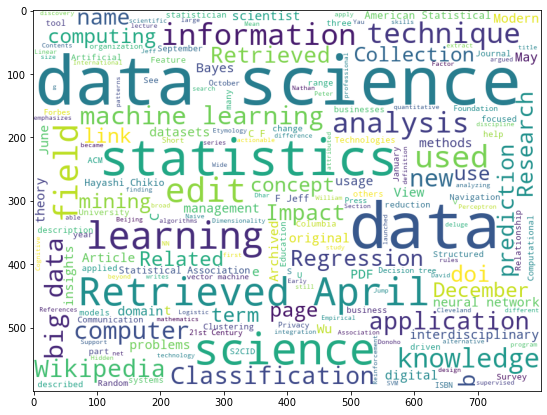

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

ワードクラウドが以前よりも印象的に見えるようになりましたが、同時に多くのノイズ（例えば、`Retrieved on`のような無関係な単語）も含まれています。また、*data scientist* や *computer science* のような2語からなるキーワードが少なくなっています。これは、RAKEアルゴリズムがテキストから適切なキーワードを選び出すのに優れているためです。この例は、データの前処理とクリーニングの重要性を示しています。最終的に明確な結果が得られることで、より良い意思決定が可能になります。

この演習では、Wikipediaのテキストからキーワードやワードクラウドの形で意味を抽出する簡単なプロセスを体験しました。この例は非常にシンプルですが、データサイエンティストがデータを扱う際に取る典型的なステップ、つまりデータの取得から可視化までの流れをよく示しています。

このコースでは、これらすべてのステップについて詳しく説明していきます。



---

**免責事項**:  
この文書は、AI翻訳サービス [Co-op Translator](https://github.com/Azure/co-op-translator) を使用して翻訳されています。正確性を期すよう努めておりますが、自動翻訳には誤りや不正確な部分が含まれる可能性があります。元の言語で記載された原文が正式な情報源と見なされるべきです。重要な情報については、専門の人間による翻訳を推奨します。この翻訳の使用に起因する誤解や誤認について、当方は一切の責任を負いません。
